# A ver si le agarramos la manos a PCA de una vez por todas

Este mini tuto es de [Errodringer](https://www.youtube.com/watch?v=k3CWA2GBb8o)

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data/iris.data', header=None)

nombre_col = ['long_sepalo', 'ancho_sepalo', 'long_petalo', 'ancho_petalo', 'clase']
df.columns = nombre_col

X_cols = ['long_sepalo', 'ancho_sepalo', 'long_petalo', 'ancho_petalo']

In [3]:
df.head(10)

,long_sepalo,ancho_sepalo,long_petalo,ancho_petalo,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [15]:
# Creo que esto es como que le hace un Z-Score
# Lo es

ss = StandardScaler()

In [16]:
df[X_cols] = ss.fit_transform(df[X_cols])

In [17]:
df.head()

,long_sepalo,ancho_sepalo,long_petalo,ancho_petalo,clase
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


In [24]:
# Defino el número de componentes que quiero
pca2 = PCA(n_components=2, random_state=42)

In [34]:
# Le dijo al algoritmo que fittee con esas columnas del DataFrame en particular (son las que tienen datos)
pca_2 = pca2.fit_transform(df[X_cols])

In [36]:
# Chusmeamos los resultados y vemos que tenemos una larga lista de 2 componentes
pca_2[:10]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ],
       [-2.07053681,  1.51854856],
       [-2.44571134,  0.07456268],
       [-2.23384186,  0.24761393],
       [-2.34195768, -1.09514636],
       [-2.18867576, -0.44862905]])

In [37]:
pca_2.shape

(150, 2)

In [38]:
# Ahora armamos un df_2 en donde vamos a poner en la primer columna el PC-1 y en la otra, PC-2
# Después ponemos también en la tercer columna la clase
df_2 = pd.DataFrame({'PC-1': pca_2[:,0], 'PC-2': pca_2[:, 1], 'Clase': df['clase']})

In [28]:
df_2.head()

,PCA1,PCA2,Clase
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [39]:
# Varianza total explicada
pca2.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [41]:
# Sumamos y vemos que podemos explicar, con 2 componentes, el 95% de la varianza total, re bien!
pca2.explained_variance_ratio_.sum()

0.9580097536148197

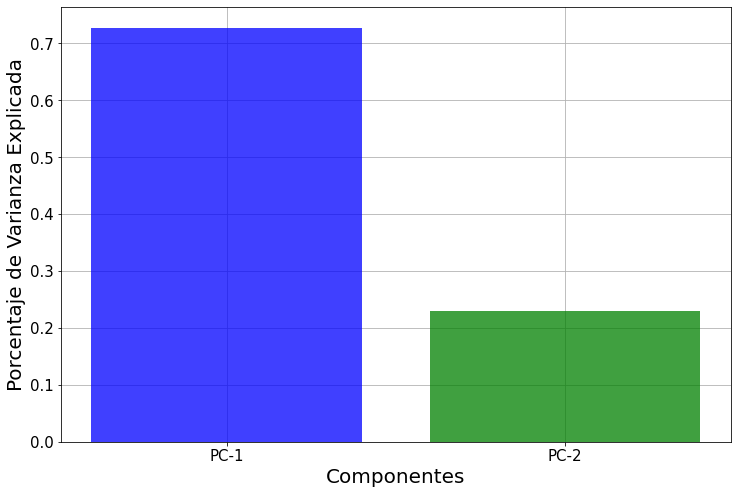

In [132]:
fig1, ax = plt.subplots(figsize = (12, 8))
ax.bar(x = ['PC-1', 'PC-2'], height = pca2.explained_variance_ratio_,
       color = ['blue', 'green'],
       alpha = 0.75,
       zorder = 3)

ax.tick_params(labelsize=15)

ax.set_ylabel('Porcentaje de Varianza Explicada',
              fontsize = 20)
ax.set_xlabel('Componentes',
              fontsize = 20)
ax.grid(True)

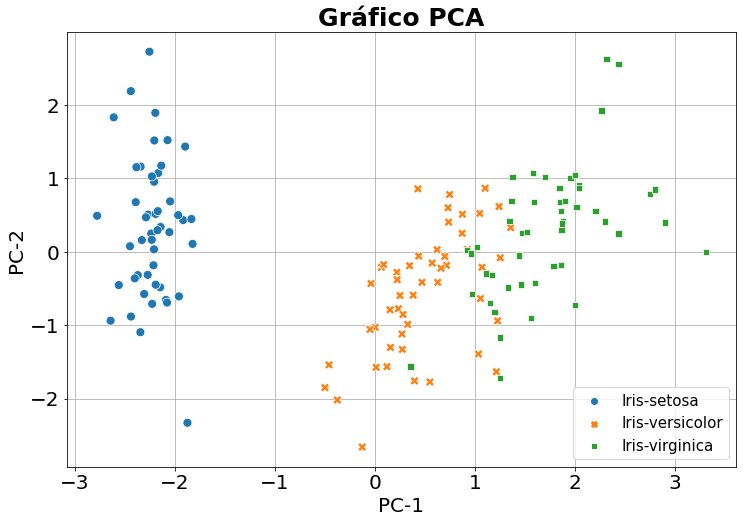

In [133]:
# Traté de hacerlo con pyplot pero no lo logré jajaja, me tengo que resigar a Seaborn

fig2, ax = plt.subplots(figsize = (12, 8))

grafico = sns.scatterplot(ax = ax, x = 'PC-1', y = 'PC-2', hue = 'Clase', data = df_2, style = 'Clase', s = 80, zorder = 3)

grafico.set_xlabel('PC-1', fontsize = 20)
grafico.set_ylabel('PC-2', fontsize = 20)
grafico.tick_params(labelsize = 20)
grafico.legend(loc = 'lower right', fontsize = 15)
grafico.set_title('Gráfico PCA', fontsize = 25, fontweight = 'bold')
grafico.grid(True)